# Part I: Implement Lasso

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
myData = pd.read_csv("Coding2_Data.csv")
var_names = myData.columns
y = myData[['Y']].to_numpy()
X = myData.drop(['Y'], axis = 1).to_numpy()

In [3]:
X.shape, len(y)

((506, 13), 506)

## CD for Lasso

In [6]:
def bstar(r, z, lam):
    znorm = np.linalg.norm(z)**2
    a = np.dot(r, z) / znorm
    l = 2 * len(r) * lam / znorm
    if a > l/2:
        bstar = a - (l/2)
    elif abs(a) <= l/2:
        bstar = 0
    elif a < -l/2:
        bstar = a + (l/2)
    else:
        raise ValueError('ya done fucked up')
    return bstar

def one_var_lasso(r, z, lam):
    #################
    # Your CODE
    #################
    return bstar(r, z, lam)

In [96]:
def MyLasso(X, y, lam_seq, maxit = 100):
    
    # Input
    # X: n-by-p design matrix without the intercept 
    # y: n-by-1 response vector 
    # lam.seq: sequence of lambda values (arranged from large to small)
    # maxit: number of updates for each lambda 
    
    # Output
    # B: a (p+1)-by-len(lam.seq) coefficient matrix 
    #    with the first row being the intercept sequence 

  
    n, p = X.shape
    nlam = len(lam_seq)
    B = np.zeros((p+1, nlam))
    
    ##############################
    # YOUR CODE: 
    # (1) newX = Standardizad X; 
    # (2) Record the centers and scales used in (1) 
    ##############################
    centers = np.mean(X,axis=0)
    scales = np.std(X,axis=0)
    newX = (X - centers)/scales
    

    # Initilize coef vector b and residual vector r
    b = np.zeros(p)
    r = y

    
    # Triple nested loop
    for m in range(nlam):
        for step in range(maxit):
            for j in range(p):
                X_j = newX[:, j].reshape(-1,1)
                r = r + X_j * b[j]
                b[j] = one_var_lasso(r.flatten(), X_j, lam_seq[m])
                r = r - X_j * b[j]
        B[1:, m] = b 
    
    ##############################
    # YOUR CODE:
    # Scale back the coefficients;
    # Update the intercepts stored in B[0,:]
    ##############################
    B[0,:] = np.mean(y) - np.sum((centers * B[1:,:].T / scales).T, axis=0) 
    
        
    B[1:,:] = (B[1:,:].T / scales).T 
    #B[1:,:] = (B[1:,:].T + centers).T
    
    
    return(B)


In [97]:
log_lam_seq = np.linspace(-1, -8, num = 80)
lam_seq = np.exp(log_lam_seq)
myout = MyLasso(X, y, lam_seq, maxit = 100)

(-8.35, -0.6499999999999999, -0.30999458351285347, 0.49974219884805476)

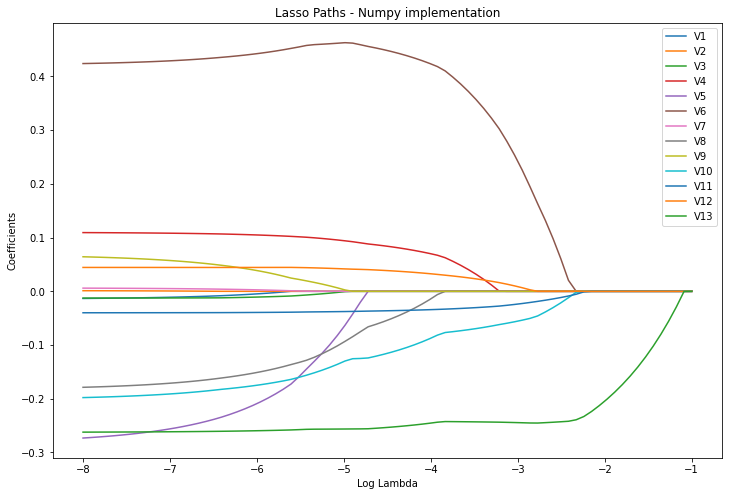

In [98]:
p, _ = myout.shape
plt.figure(figsize = (12,8))

for i in range(p-1):
    plt.plot(log_lam_seq, myout[i+1, :], label = var_names[i])

plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

In [99]:
lasso_coef = pd.read_csv("Coding2_lasso_coefs.csv").to_numpy()
lasso_coef.shape

(14, 80)

In [100]:
abs(myout - lasso_coef).max()

0.004645317415906014